<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/Copy_of_TTR_progetto_multiclassSVM_PCA_300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificatore: SVM

Features: estratte da immagini nwh con PCA (primi 300 autovalori)

In [ ]:
!wget https://www.dropbox.com/s/yfnlbmxapig2t6p/features_PCA_300.zip?dl=0
!unzip features_PCA_300.zip?dl=0

!wget https://www.dropbox.com/s/rhbde9gw8vnk9dm/array_labels.zip?dl=0
!unzip array_labels.zip?dl=0

--2022-05-09 19:43:41--  https://www.dropbox.com/s/yfnlbmxapig2t6p/features_PCA_300.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yfnlbmxapig2t6p/features_PCA_300.zip [following]
--2022-05-09 19:43:41--  https://www.dropbox.com/s/raw/yfnlbmxapig2t6p/features_PCA_300.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc55b672800b7061a5d978481369.dl.dropboxusercontent.com/cd/0/inline/Bk_3cq1oys3mOTytpYTQ7BAXV0sZxZXlTOIZfNdbCNPUfoyKnENLamMD0UJQGI3OmnoW7Pz91KqDgF35DpoLBZwsFoLdMd6f8nlpPz2YUQBPXh9ZLufgh0jSa4lLNm2r5O1K6sb_U9_aMBcDcjgsWcnMQMErN1p_uBJTlhuK3Fqngg/file# [following]
--2022-05-09 19:43:42--  https://uc55b672800b7061a5d978481369.dl.dropboxusercontent.com/cd/0/inline/Bk_3cq1oys3mOTytpYTQ7BAXV0sZxZXlTOIZfNd

In [ ]:
# Versione one-vs-rest del classificatore SVM per distinguere le classi del dataset FER_modified

import numpy as np

# Carico in memoria le features
x_train = np.load('features_PCA_300/features_train_PCA_300.npy')
y_train = np.load('array_labels/array_train_labels.npy')

x_test = np.load('features_PCA_300/features_test_PCA_300.npy')
y_test = np.load('array_labels/array_test_labels.npy')

In [ ]:
print("np.shape(x_train): ")
print(np.shape(x_train))
print("np.shape(y_train): ")
print(np.shape(y_train))
print("np.shape(x_test): ")
print(np.shape(x_test))
print("np.shape(y_test): ")
print(np.shape(y_test))
print(x_train[2])
print(x_test[2])
print(y_train)
print(y_test)

np.shape(x_train): 
(31805, 300)
np.shape(y_train): 
(31805,)
np.shape(x_test): 
(7178, 300)
np.shape(y_test): 
(7178,)
[-1.08130893e+02 -1.14023393e+03  1.05058940e+03 -7.68491206e+02
  1.27665598e+03  1.01379858e+02  1.48987063e+03  2.19724893e+02
 -2.72185958e+02 -4.38512330e+02 -1.51264990e+02  2.89427988e+02
  1.91824379e+02  7.41420841e+01 -2.24000655e+01  1.77829861e+02
  3.00107388e+02  6.39984120e+01  1.37926536e+02  4.04248800e+01
  3.21806859e+02 -1.66000144e+02  3.18322904e+02  2.00731870e+02
  1.76659939e+01  2.21922550e+02  7.02092639e+01 -4.05955402e+02
 -2.25698798e+02  3.39993828e+01 -5.58172712e+01 -1.39703950e+02
  1.09841511e+02 -1.72716180e+02  1.78733182e+02 -2.12468246e+02
 -2.03369800e+02 -2.39722965e+02 -8.69923164e+01  4.14879233e+02
  6.45745924e+01  3.19455554e+02  1.90069512e+02 -1.71293229e+02
 -1.81374115e+01  7.55568231e+01 -1.20459093e+02  1.60599669e+01
  1.61537362e+02  5.12906983e+00  2.04821535e+02 -1.57498038e+00
 -1.00685033e+02 -6.44094872e+01 -4

31805 300


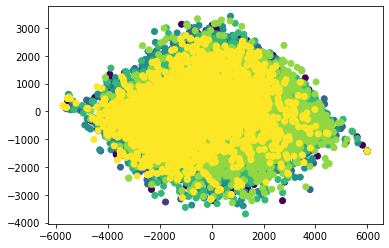

In [ ]:
# Analizzo i dati

# Capisco quanti oggetti e feature ho
nobj = x_train.shape[0]
nfeat = x_train.shape[1]
print(nobj, nfeat)

# Capisco come sono i dati: scatter plot con le prime 2 features
from matplotlib import pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.show()


In [ ]:
from sklearn.svm import SVC

# Inizializzo i parametri

kernel = 'rbf'
#degree = 5
#probability = True
# class_weight = dict or ‘balanced’, default=None
decision_function_shape = 'ovr'

max_iteration = 10000

# Inizializzo un modello di classificazione SVM per ognuna delle 7 classi

models = [SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True)]

In [ ]:
# Addestro i modelli

for i in range(7):
  models[i].fit(x_train, y_train==i)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

In [ ]:
# Classifico i dati del testing set

predicted_scores = []
for i in range(7):
  predicted_scores.append(models[i].predict_proba(x_test)[:,1])

predicted_scores = np.asarray(predicted_scores)
predicted = np.argmax(predicted_scores,axis=0)

print(np.shape(predicted_scores))
print(np.shape(predicted))
print(predicted_scores[:7])
print(predicted[:20])

(7, 7178)
(7178,)
[[0.31406119 0.43158702 0.14336855 ... 0.15089844 0.18065007 0.05215939]
 [0.00310893 0.00458041 0.00776397 ... 0.00483245 0.00814723 0.00652254]
 [0.08914174 0.12102909 0.05977681 ... 0.08122316 0.06714558 0.09811141]
 ...
 [0.09796399 0.10703205 0.05443827 ... 0.16967438 0.09683639 0.13782415]
 [0.16190464 0.17090896 0.55585529 ... 0.17480678 0.14083553 0.19042372]
 [0.02307023 0.06644495 0.05018545 ... 0.02771996 0.31669108 0.64581443]]
[3 0 5 0 0 0 3 0 0 0 0 3 0 4 0 0 0 3 0 0]


In [ ]:
# matrice di confusione

cmc = np.zeros((7,7))

for pr,y_te in zip(predicted,y_test):
  cmc[y_te,pr] += 1.0

In [ ]:
# calcolo accuratezza, precision e recall media rispetto alle 7 classi

accuracy = np.sum(cmc.diagonal())/np.sum(cmc)

precision = []
recall = []
for i in range(7):
  precision.append(cmc[i,i]/ np.sum(cmc[:,i]))
  recall.append(cmc[i,i]/ np.sum(cmc[i,:]))

precision = np.asarray(precision)
recall  = np.asarray(recall)

print(np.shape(precision))
print(np.shape(recall))

precision_m = np.mean(precision)
recall_m = np.mean(recall)

print(np.shape(precision_m))
print(np.shape(recall_m))
print(precision_m)
print(recall_m)

print('Accuratezza del classificatore: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precisione media del classificatore: ' + "{0:.2f}".format(precision_m))
print('Recall media del classificatore: ' + "{0:.2f}".format(recall_m))

(7,)
(7,)
()
()
0.6827924333449539
0.6173249955256142
Accuratezza del classificatore: 62.18%
Precisione media del classificatore: 0.68
Recall media del classificatore: 0.62


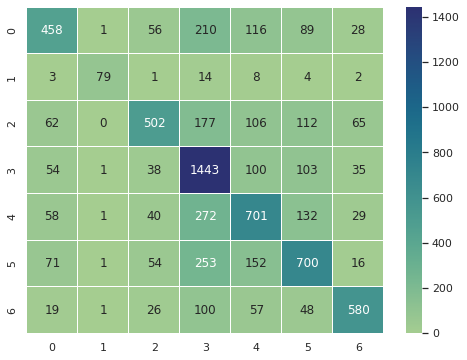

In [ ]:
# stampo la matrice di confusione

import seaborn as sns; 


plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc, annot=True,fmt=".0f", linewidths=.1, cmap="crest")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")


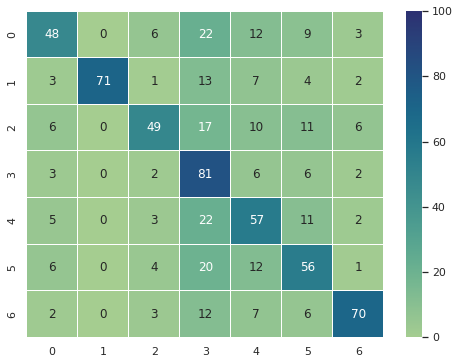

In [ ]:
# ATTENZIONE, con questo codice vengono cambiati i valori della matrice cmc
# viene fatto solo per plottare una matrice con le percentuali per ogni riga

cmc2 = cmc

for i in range(7):
  total = 0
  for j in range(7):
    total += cmc[i,j]
  for j in range(7):
    cmc2[i,j] = cmc[i,j]*100/total
  
plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc2, annot=True,vmin=0.0, vmax=100.0,fmt=".0f", linewidths=.1, cmap="crest")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")